# **21BAI1499 - ANALYTICS VIDHYA LOAN PREDICTION**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection  import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error

import pickle

%matplotlib inline

Import Dataset

In [ ]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [ ]:
print('Train')
train.info()

print('Train')
test.info()

print('Data')
train.head()

Train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
Train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 colum

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Preprocessing

In [ ]:
for i in train.columns:
  print(i, ":", train[i].isna().sum())

Loan_ID : 0
Gender : 13
Married : 3
Dependents : 15
Education : 0
Self_Employed : 32
ApplicantIncome : 0
CoapplicantIncome : 0
LoanAmount : 22
Loan_Amount_Term : 14
Credit_History : 50
Property_Area : 0
Loan_Status : 0


In [ ]:
#Gender, Married, Dependents, Self_employed, Loan amount, Loan amount term, Credit history has missing values
#Replace Gender, Married, Dependents, Credit history, Self employed with mode
#Replace Loan Amount Term with mode because even though its numerical it doesnt have a huge range of values

train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)

In [ ]:
#Replace loan amount with medain
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [ ]:
for i in train.columns:
  print(i, ":", train[i].isna().sum())

Loan_ID : 0
Gender : 0
Married : 0
Dependents : 0
Education : 0
Self_Employed : 0
ApplicantIncome : 0
CoapplicantIncome : 0
LoanAmount : 0
Loan_Amount_Term : 0
Credit_History : 0
Property_Area : 0
Loan_Status : 0


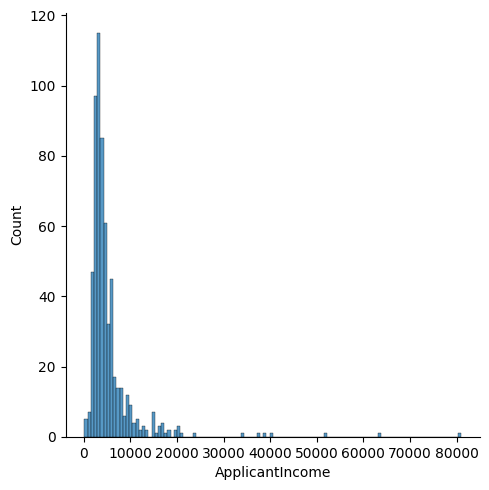

In [ ]:
#Visualizing important numerical data
sns.displot(train.ApplicantIncome)

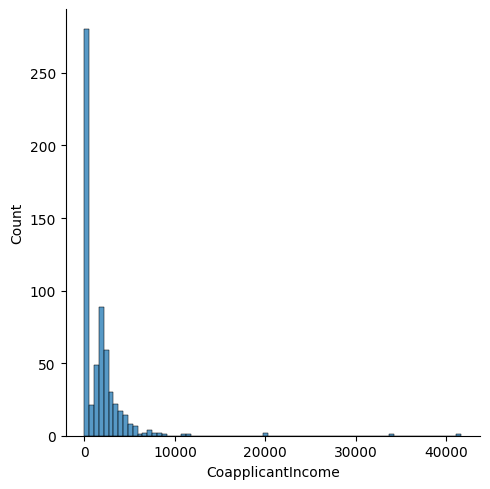

In [ ]:
sns.displot(train.CoapplicantIncome)

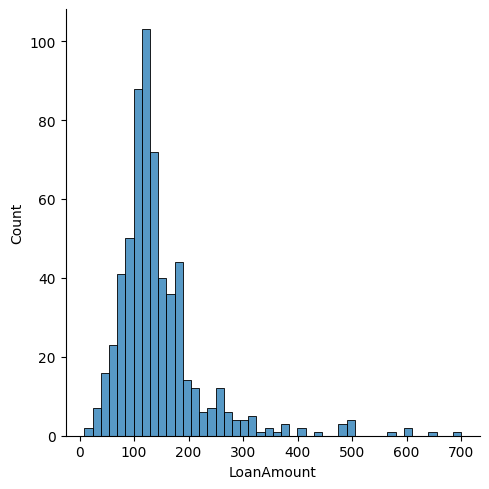

In [ ]:
sns.displot(train.LoanAmount)

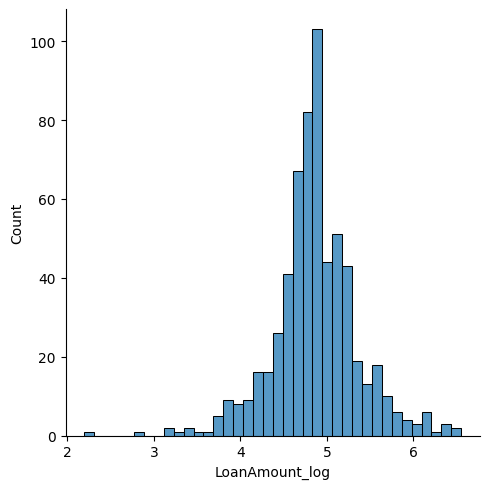

In [ ]:
#Loan amount has a lot of outliers so we use a log transform
train['LoanAmount_log']=np.log(train['LoanAmount'])
sns.displot(train.LoanAmount_log)

In [ ]:
#Converting all categorical into numeric data
ReqCols = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
encoder= LabelEncoder()
for i in ReqCols:
  train[i] = encoder.fit_transform(train[i])

In [ ]:
train.head()
#Loan status y-1, n-0

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1,4.852030
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,4.852030
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,4.189655
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,4.787492
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,4.948760


## Modeling

In [ ]:
#Loan id has nothing to do with loan, so we drop it temporarily
df=train.drop('Loan_ID', axis=1).copy()
np.all(np.isfinite(df))

True

In [ ]:
X = df.drop('Loan_Status', axis=1).copy()
y = df['Loan_Status'].copy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, shuffle=True, random_state=1)
scaler = RobustScaler()
scaler.fit(X_train)
train_x=scaler.transform(X_train)

Logistic Regression

In [ ]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy*100)

Accuracy: 79.26829268292683


KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.6097560975609756


## Output

Preprocess Test Dataset

In [ ]:
test=pd.read_csv('/content/test.csv')

In [ ]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Married'].fillna(test['Married'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)

test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)

In [ ]:
test['LoanAmount_log']=np.log(test['LoanAmount'])

In [ ]:
ReqCols = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
encoder= LabelEncoder()
for i in ReqCols:
  test[i] = encoder.fit_transform(test[i])

In [ ]:
ids=test['Loan_ID'].copy()
df2=test.drop('Loan_ID', axis=1).copy()
np.all(np.isfinite(df2))

True

Getting Prediction

In [ ]:
#Since Logistic regeression has higher Accuracy we go with logistic regression
pred = logreg.predict(df2)

In [ ]:
op=([str(i) for i in pred])
for i in range(len(op)):
  if op[i]=='1':
    op[i]='Y'
  else:
    op[i]='N'

op=pd.Series(op)
res=pd.concat([ids, op],axis=1)

In [ ]:
res.rename(columns = {0:'Loan_Status'}, inplace = True)
res

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [ ]:
res.to_csv('output.csv', index=False)